In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('../data/ready/XRP.csv',index_col='time').drop('Unnamed: 0', axis = 1).dropna()
df.shape

(60, 20)

In [4]:
df['met_threshold'].value_counts(normalize=True)

1.0    0.883333
0.0    0.116667
Name: met_threshold, dtype: float64

In [5]:
target = df['met_threshold']
features = df.drop(['met_threshold','lag_time'], axis=1)
scaler = StandardScaler()
features = scaler.fit_transform(features)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
met_threshold_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

met_threshold_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = met_threshold_model.fit(features_train, target_train, epochs=100, validation_data=(features_test, target_test))

Epoch 1/100
2/2 [==============================] - 1s 113ms/step - loss: 0.7173 - accuracy: 0.5417 - val_loss: 0.7391 - val_accuracy: 0.5833
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6140 - accuracy: 0.6875 - val_loss: 0.6756 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6216 - accuracy: 0.6458 - val_loss: 0.6234 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.5628 - accuracy: 0.7917 - val_loss: 0.5819 - val_accuracy: 0.8333
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.5292 - accuracy: 0.8333 - val_loss: 0.5502 - val_accuracy: 0.8333
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 0.4618 - accuracy: 0.8750 - val_loss: 0.5251 - val_accuracy: 0.8333
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 0.4224 - accuracy: 0.8958 - val_loss: 0.5053 - val_accuracy: 0.8333
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 22ms/step - loss: 0.1243 - accuracy: 0.9583 - val_loss: 0.2788 - val_accuracy: 0.8333
Epoch 60/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1041 - accuracy: 0.9583 - val_loss: 0.2699 - val_accuracy: 0.8333
Epoch 61/100
2/2 [==============================] - 0s 24ms/step - loss: 0.1027 - accuracy: 0.9792 - val_loss: 0.2615 - val_accuracy: 0.8333
Epoch 62/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1129 - accuracy: 0.9375 - val_loss: 0.2548 - val_accuracy: 0.8333
Epoch 63/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1000 - accuracy: 0.9792 - val_loss: 0.2496 - val_accuracy: 0.8333
Epoch 64/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0853 - accuracy: 1.0000 - val_loss: 0.2449 - val_accuracy: 0.8333
Epoch 65/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0878 - accuracy: 0.9583 - val_loss: 0.2393 - val_accuracy: 0.8333
Epoch 66/100
2/2 [========

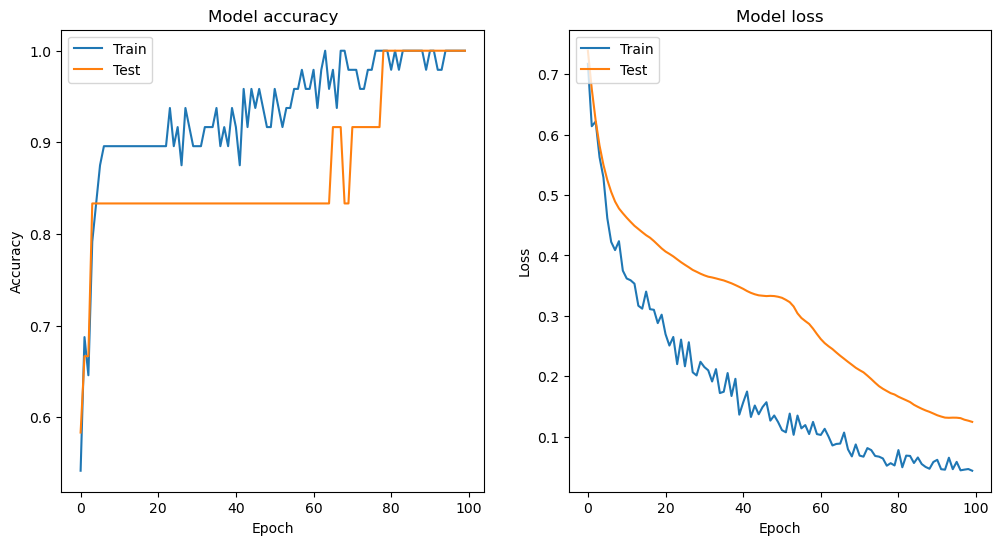

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [10]:
predictions = met_threshold_model.predict(features)
predicted_classes = (predictions >0.5).astype('int32')

2/2 [==============================] - 0s 2ms/step


Accuracy: 100.0%


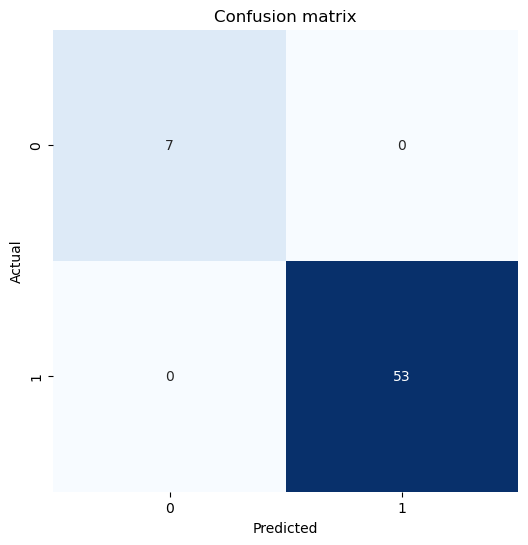

In [11]:
accuracy = accuracy_score(target, predicted_classes)
print(f"Accuracy: {accuracy * 100}%")

cm = confusion_matrix(target, predicted_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [12]:
df_predicted = df.copy()
df_predicted['met_threshold'] = predicted_classes
df_predicted['lag_time'] = pd.to_timedelta(df['lag_time']).dt.total_seconds() / 3600

In [13]:
features = df_predicted.drop('lag_time', axis=1)
target = df_predicted['lag_time']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [14]:
lag_model = Sequential([
    Dense(64, activation='relu', input_shape=(features_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1)
])

lag_model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lag_model.fit(features_train, target_train, 
                    epochs=100, 
                    validation_data=(features_test, target_test),
                    callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 1s 104ms/step - loss: 9.1956 - val_loss: 6.7921
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 7.5060 - val_loss: 6.1571
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 7.5854 - val_loss: 5.6037
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 6.0786 - val_loss: 5.1332
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 5.7776 - val_loss: 4.7388
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 5.5574 - val_loss: 4.4245
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 4.5864 - val_loss: 4.1834
Epoch 8/100
2/2 [==============================] - 0s 23ms/step - loss: 4.9764 - val_loss: 3.9998
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 5.1947 - val_loss: 3.8688
Epoch 10/100
2/2 [==============================] - 0s 24ms/step - loss: 4.0664 - val_loss: 3.7798
Epoch 11/100
2/2 [

1/1 [==============================] - 0s 39ms/step


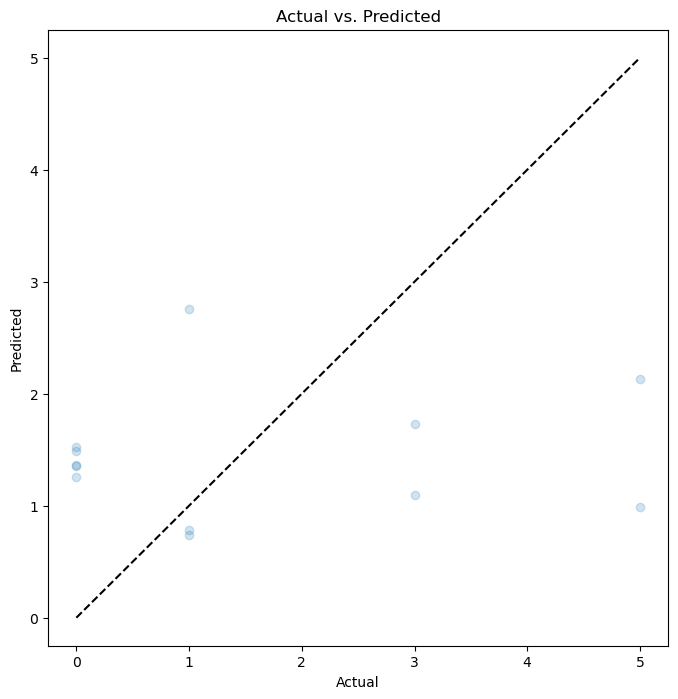

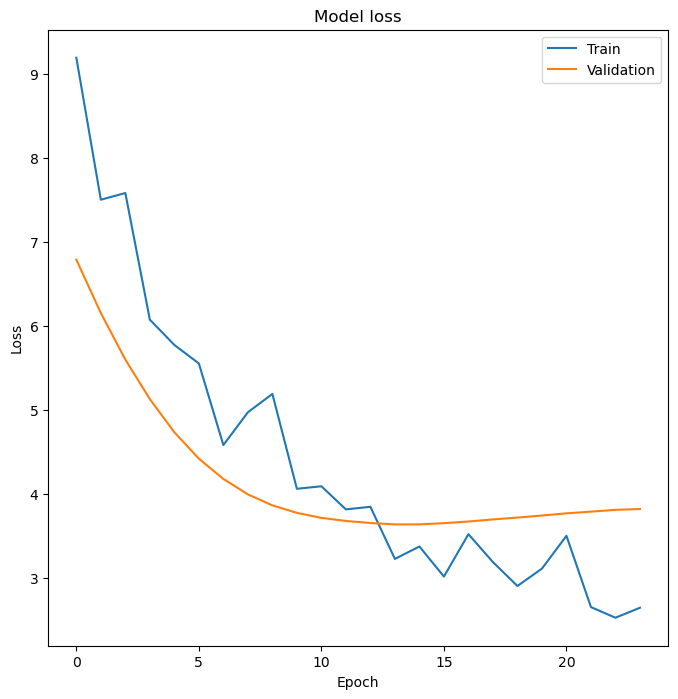

In [15]:
# Make predictions on the test set
predictions_test = lag_model.predict(features_test)

# Create a scatter plot of the actual versus predicted values
plt.figure(figsize=(8, 8))
plt.scatter(target_test, predictions_test, alpha=0.2)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Create a plot of the training and validation loss
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
features_scaled = scaler.transform(features)
predictions_all = lag_model.predict(features_scaled)
df_predicted['lag_time'] = np.around(predictions_all).flatten()
df_predicted.head()

2/2 [==============================] - 0s 2ms/step


,BTC_open,BTC_close,BTC_volume,XRP_open,XRP_close,XRP_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_XRP_change_1hr,perc_XRP_change_2hr,perc_XRP_change_3hr,perc_XRP_change_4hr,perc_XRP_change_5hr,perc_XRP_change_6hr,lag_time,met_threshold
time,,,,,,,,,,,,,,,,,,,,
2017-01-07 10:00:00,824.16,867.68,8.454079e+06,0.006265,0.006216,158.24,5.280528,5.444293,7.106442,4.150762,3.461516,5.348275,-0.782123,-1.333333,-0.032165,-0.032165,-0.861244,0.338983,1.0,0
2017-03-10 13:00:00,1199.95,1268.92,3.985328e+07,0.006440,0.006290,40448.37,5.747739,5.987989,5.856247,6.474458,6.916745,6.738671,-2.177294,-1.963840,-2.329193,-2.480620,-1.255887,-0.788644,1.0,0
2017-06-15 14:00:00,2152.75,2273.54,4.840666e+07,0.217300,0.232000,1503947.69,5.610963,-1.826127,-1.622646,-3.270905,-5.560748,-7.978062,6.764841,-2.806871,-1.653243,-5.073650,-7.200000,-10.769231,4.0,1
2017-07-20 11:00:00,2354.80,2472.97,4.957016e+07,0.172000,0.180000,879636.25,5.018261,5.497182,5.382095,5.783289,5.560227,4.625050,4.651163,7.526882,7.398568,7.015458,6.824926,6.445890,1.0,1
2017-09-15 12:00:00,3018.12,3360.86,1.559127e+08,0.153400,0.171300,3206468.31,11.356076,10.808663,9.886610,6.705147,7.347253,7.185319,11.668840,8.075710,4.323995,1.601423,0.528169,1.301005,1.0,1


In [17]:
df_predicted.to_csv('../data/predictions/XRP_predicted.csv')